In [1]:
# Importing libraries and dependecies :
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
import requests
import pandas as pd
import alpaca_trade_api as trade_api
from alpaca_trade_api.rest import REST, TimeFrame

In [3]:
# Crypto amount :
btc_amount = 1.2
eth_amount = 5.3
monthly_income = 12000

In [4]:
# assigning the url to retreive thier prices :
url_btc =  'https://api.alternative.me/v2/ticker/bitcoin/?convert=CAD'
url_eth =  'https://api.alternative.me/v2/ticker/ethereum/?convert=CAD'

In [5]:
# Requesting response from the url :
response_btc = requests.get(url_btc)
response_eth = requests.get(url_eth)

In [6]:
# Accessing the content of the response :
btc_data = response_btc.content
eth_data=response_eth.content

# Importing json to read the response by calling the json function :
import json
btc = response_btc.json()
eth = response_eth.json()

In [7]:
# Accessing the closing price of ethereum and bitcoin from the dataframe:
eth['data']['1027'].keys()

dict_keys(['id', 'name', 'symbol', 'website_slug', 'rank', 'circulating_supply', 'total_supply', 'max_supply', 'quotes', 'last_updated'])

In [8]:
btc_price = btc['data']['1']['quotes']['CAD']['price']
eth_price = eth['data']['1027']['quotes']['CAD']['price']
btc_price

54666.0554

In [9]:
# Finding out the dollar amount of crypto :
btc_portfolio_value = btc_price*btc_amount
print(f'BTC portfolio value :{round(btc_portfolio_value,2)}')

BTC portfolio value :65599.27


In [10]:
eth_portfolio_value = eth_price*eth_amount
print(f'ETH portfolio value :{round(eth_portfolio_value,2)}')

ETH portfolio value :21472.6


In [11]:
# Number of shares in portfolio:
spy_shares = 50
agg_shares = 200

In [12]:
# Assigning keys to variables which will be used later to access the stock data :
alpaca_key = os.getenv('ALACA_KEY')
alpaca_secret = os.getenv('ALPACA_SECRET')
# Making sure that the key actually got assigned :
type(alpaca_key)

str

In [13]:
# Gaining access to the website through api keys that were assigned to variables :
alpaca = trade_api.REST(alpaca_key,alpaca_secret,api_version='v2')

In [14]:
tickers = ['SPY','AGG']

In [15]:
# Gaetting the data for the desired stocks :
data = alpaca.get_bars(tickers,TimeFrame.Day,'1982-03-24','2022-03-24',adjustment ='raw').df

In [16]:
data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,108.54,108.8400,108.43,108.82,4259986,15562,108.754152,AGG
2015-12-02 05:00:00+00:00,108.73,108.7799,108.61,108.67,2462787,11581,108.684692,AGG
2015-12-03 05:00:00+00:00,108.41,108.4100,107.81,107.89,4634020,16801,108.040315,AGG
2015-12-04 05:00:00+00:00,108.05,108.3000,108.00,108.24,2182057,9796,108.192232,AGG
2015-12-07 05:00:00+00:00,108.30,108.5800,108.23,108.40,2143773,9104,108.460067,AGG


In [17]:
# Changing the format of the table so it is compatible with MC-Simulation library:
spy = data[data['symbol'] == 'SPY'].drop('symbol' , axis = 1)
agg = data[data['symbol']== 'AGG'].drop('symbol' , axis = 1)

In [18]:
spy.tail()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-03-18 04:00:00+00:00,437.81,444.86,437.22,444.31,102327793,790235,441.458916
2022-03-21 04:00:00+00:00,444.45,446.46,440.68,444.30,85377983,912432,443.796432
2022-03-22 04:00:00+00:00,445.99,450.58,445.86,449.59,73674202,623610,448.558595
2022-03-23 04:00:00+00:00,446.90,448.49,443.71,443.80,77982935,627281,446.058683
2022-03-24 04:00:00+00:00,445.82,450.50,444.76,450.48,61411569,526865,447.609014


In [19]:
# computing the dollar value of the current amount of shares :
spy_last_close = spy['close'][-1]
agg_last_close=agg['close'][-1]
dollar_amount_spy = spy_last_close*spy_shares
dollar_amount_agg = agg_last_close*agg_shares
print(f'Dollar amount of spy shares : {dollar_amount_spy}')
print(f'Dollar amount of agg shares : {dollar_amount_agg}')

Dollar amount of spy shares : 22524.0
Dollar amount of agg shares : 21390.0


In [20]:
# Savings Health Analysis:

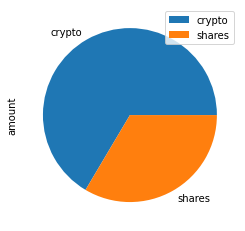

In [21]:
# /Creating a savings data frame
df_savings = pd.DataFrame(
    {'crypto' : [eth_portfolio_value+btc_portfolio_value],
     'shares' : [dollar_amount_agg+dollar_amount_spy]
    })
# Transposing to get the desired schema and renaming columns :
df_savings = df_savings.T
df_savings.rename(columns={0:'amount'},inplace = True)
savings_pie_chart = df_savings.plot(kind = 'pie',subplots = True)

In [22]:
# Using logical statements that when run on the account will inform about the status of ones account :
if float(df_savings.iloc[0].values+df_savings.iloc[1].values) > monthly_income*3:
    print('Congratulations you have more than the threshold')
elif float(df_savings.iloc[0].values+df_savings.iloc[1].values) == monthly_income*3:
    print('Congratulations your savings have reached the required target')
elif float(df_savings.iloc[0].values+df_savings.iloc[1].values) < monthly_income*3:
    differnce = float(df_savings.iloc[0].values+df_savings.iloc[1].values) - (monthly_income*3)
    print(f'you must save {differnce} $ more to acheive your savings goal')

Congratulations you have more than the threshold


In [23]:
# Retirement Planning :

In [46]:
# Concatenatingting the stock data so that we can analyze the most optimal combination for
#  maximum returns with reasonable risk.
df =pd.concat([spy,agg],axis = 'columns',keys = ['spy','agg'] )

In [25]:
df.index = df.index.date

In [26]:
df.head()

spy                                                     \
              open      high       low   close     volume trade_count   
2015-12-01  209.42  210.8200  209.1100  210.68   97858418      337780   
2015-12-02  210.60  211.0000  208.2300  208.54  108069059      367013   
2015-12-03  208.90  209.1500  204.7511  205.58  166224154      546768   
2015-12-04  206.10  209.9700  205.9300  209.66  192878747      556731   
2015-12-07  209.20  209.7295  207.2000  208.27  102027111      374705   

                           agg                                                 \
                  vwap    open      high     low   close   volume trade_count   
2015-12-01  209.921410  108.54  108.8400  108.43  108.82  4259986       15562   
2015-12-02  209.563055  108.73  108.7799  108.61  108.67  2462787       11581   
2015-12-03  206.878936  108.41  108.4100  107.81  107.89  4634020       16801   
2015-12-04  208.178631  108.05  108.3000  108.00  108.24  2182057        9796   
2015-12-07  208.276128  108.30  108.5800  108.23  108.40  2143773        9104   

                        
                  vwap  
2015-12-01  108.754152  
2015-12-02  108.684692  
2015-12-03  108.040315  
2015-12-04  108.192232  
2015-12-07  108.460067

In [28]:
# Running the monte Carlo Simulation to visually see the possible outcomes,
# for a certain amount of period and then deducing information from the results:
from MCForecastTools import MCSimulation

In [47]:
#  Using standard 60-40 weightage of bonds and stocks:
weights = [.6,.4]

In [30]:
simulation = MCSimulation(portfolio_data = df,  weights= [.4,.6] , num_simulation = 500 ,num_trading_days = 252*30)

In [31]:
simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Zahra\Desktop\All_HomeWorks\API_HomeWork\api_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000446,0.989471,1.001810,0.998742,0.994299,1.001553,0.991433,0.998233,1.005055,0.999400,...,1.009528,0.987246,0.987823,0.998798,0.998830,1.004191,1.003881,0.995268,0.997341,1.006657
2,1.000576,0.999211,1.002538,0.990668,0.991444,1.001575,0.990690,1.003882,1.012077,0.996272,...,1.003625,0.985815,0.992496,0.997915,1.002886,0.999547,1.005136,0.991947,1.001708,1.004695
3,1.005961,0.992081,0.997810,0.980277,1.007061,0.997536,0.993266,1.002112,1.007410,0.997803,...,0.999011,0.995828,0.987997,0.995613,1.006334,1.005615,0.998488,0.997142,1.002950,1.011685
4,1.007710,0.982368,0.990063,0.978430,1.007885,1.002555,0.999799,1.000298,1.006739,1.004123,...,0.995877,1.003695,0.985119,0.986933,1.004824,0.998782,0.997825,0.997992,1.006992,1.007098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.880443,3.162832,5.849986,6.273547,1.395550,10.117708,3.994789,6.899864,8.058706,3.397131,...,7.112197,6.704949,6.799401,2.661678,1.970727,4.876157,2.597508,5.172939,3.010334,4.493139
7557,10.794364,3.149529,5.852049,6.296814,1.407322,10.121248,4.011740,6.898612,8.127436,3.422536,...,7.160187,6.674937,6.826468,2.632988,1.979481,4.849422,2.600980,5.147833,2.994971,4.449715
7558,10.898861,3.143856,5.809252,6.277466,1.405169,10.092974,4.034520,6.931018,8.133378,3.453735,...,7.153320,6.667969,6.812562,2.615043,1.974440,4.807638,2.589336,5.199735,3.005257,4.415158
7559,10.881261,3.139154,5.770680,6.268172,1.403491,10.080700,4.068404,6.901801,8.172295,3.462551,...,7.204203,6.661974,6.786389,2.598611,1.978604,4.781862,2.603236,5.221807,3.031354,4.397376


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

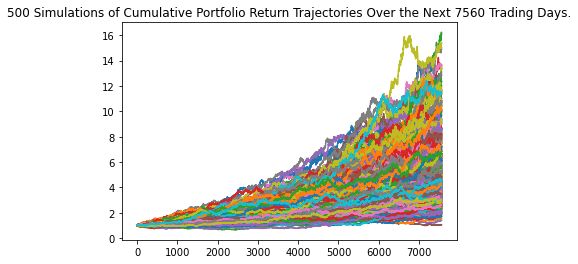

In [33]:
simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

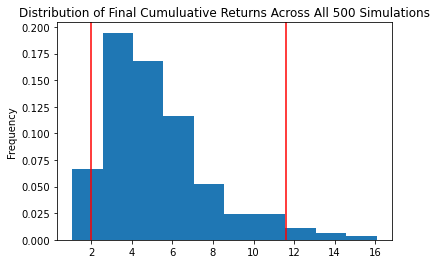

In [34]:
simulation.plot_distribution()

In [41]:
stats = simulation.summarize_cumulative_return()
stats

count           500.000000
mean              5.231738
std               2.562855
min               1.061862
25%               3.425962
50%               4.569390
75%               6.415744
max              16.061163
95% CI Lower      1.984445
95% CI Upper     11.610392
Name: 7560, dtype: float64

In [45]:
# Expected range of returns with 95 % confidence :
initial_investment = 20000
ci_upper = stats[9]*initial_investment
ci_lower = stats[8]*initial_investment
print(f'Expected portfolio returns with 95% upper confidence interval : {round(ci_upper,2)}')
print(f'Expected portfolio returns with 95% lower confidence interval : {round(ci_lower,2)}')
 

Expected portfolio returns with 95% upper confidence interval : 232207.84
Expected portfolio returns with 95% lower confidence interval : 39688.91


In [37]:
mean_return = round((((stats[1]*initial_investment)-initial_investment)/initial_investment)*100,2)
mean_return

423.17

In [38]:
# Expencted outcome with 95 % confidencce with 1.5 times the given amount on initial investment :
increased_initial_investment = initial_investment*1.5
ci_upper = stats[9]*increased_initial_investment
ci_lower = stats[8]*increased_initial_investment
print(f'Expected portfolio returns with 95% upper confidence interval : {round(ci_upper,2)}')
print(f'Expected portfolio returns with 95% lower confidence interval : {round(ci_lower,2)}')

Expected portfolio returns with 95% upper confidence interval : 348311.77
Expected portfolio returns with 95% lower confidence interval : 59533.36


In [38]:
# Early Retirement :

In [48]:
#  By Increasing the weight of spy to 60 % :
inc_risk = MCSimulation(portfolio_data = df,  weights= [.6,.4] , num_simulation = 500 ,num_trading_days = 252*10)

In [49]:
inc_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Zahra\Desktop\All_HomeWorks\API_HomeWork\api_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994400,0.998442,0.996798,0.991332,1.012748,1.005199,1.016285,1.001013,0.998119,1.000527,...,1.012308,0.995248,1.004761,0.999067,1.005340,1.009901,1.006665,0.996232,1.002643,1.006254
2,0.982464,1.004026,0.998365,0.991232,1.015055,0.988319,1.008890,0.996239,0.992692,1.009899,...,1.008581,0.990506,1.009665,0.997574,0.998570,1.007851,1.010739,0.990036,1.018235,1.004090
3,0.978810,1.000486,1.007430,0.996539,1.016004,0.992038,1.009839,1.005678,0.989195,1.015627,...,1.010838,0.986112,1.013355,1.000276,0.988248,1.011858,0.999371,0.986784,1.019497,1.006774
4,0.989252,0.998588,1.024150,0.989477,1.025053,1.001240,1.009353,1.007343,1.000464,1.016696,...,1.008471,0.990469,1.018731,0.999801,0.995694,1.014868,1.008761,0.975631,1.016594,1.008031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.635985,2.030846,2.795188,1.916445,2.032483,3.565713,2.628801,1.650725,1.394753,1.370878,...,2.681491,1.655511,1.008849,2.231566,0.881784,1.938471,2.159123,3.873829,2.202376,2.713973
2517,3.628461,2.038942,2.761181,1.955560,2.037990,3.575836,2.640189,1.626766,1.390719,1.351772,...,2.702467,1.646187,1.020170,2.226625,0.884824,1.963161,2.134051,3.876922,2.205946,2.699826
2518,3.628061,2.021877,2.765260,1.953100,2.040429,3.572179,2.625988,1.610153,1.380423,1.344309,...,2.678186,1.647391,1.021621,2.220173,0.889695,1.955560,2.120829,3.859881,2.205466,2.692150
2519,3.691106,2.025934,2.753779,1.977835,2.022665,3.545919,2.627879,1.600006,1.369738,1.356112,...,2.644206,1.647558,1.014216,2.207273,0.903508,1.984540,2.127142,3.864622,2.225116,2.675138


In [51]:
# Stats of simulation of portfolio with increased weaightage of stocks :
stats_risk= inc_risk.summarize_cumulative_return()
stats_risk

count           500.000000
mean              2.243133
std               0.797365
min               0.622533
25%               1.694603
50%               2.106153
75%               2.645696
max               6.420708
95% CI Lower      1.062798
95% CI Upper      4.020054
Name: 2520, dtype: float64

In [52]:
ci_upper = stats_risk[9]*initial_investment
ci_lower = stats_risk[8]*initial_investment
print(f'Expected portfolio returns with 95% upper confidence interval : {round(ci_upper,2)}')
print(f'Expected portfolio returns with 95% lower confidence interval : {round(ci_lower,2)}')

Expected portfolio returns with 95% upper confidence interval : 80401.08
Expected portfolio returns with 95% lower confidence interval : 21255.95


In [53]:
mean_risky_return = round((((stats_risk[1]*initial_investment)-initial_investment)/initial_investment)*100,2)
mean_risky_return

124.31

## The above calculation shows that with 60% investments in stocks we can have approximately same mean returns in 10 years ,that were possible with 40% investments in stocks in 30 years.

In [54]:
# To achieve the same result with same risk apetite in 10 years , we can increase the amount of initial investment:

In [55]:
sim_inc_investment = MCSimulation(portfolio_data = df,  weights= [.4,.6] , num_simulation = 500 ,num_trading_days = 252*10)

In [56]:
sim_inc_investment.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Zahra\Desktop\All_HomeWorks\API_HomeWork\api_homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992083,0.998287,1.002650,1.002875,0.998206,1.012627,1.004576,1.003335,0.996750,0.994125,...,1.004495,1.000109,0.995299,1.004737,1.006086,1.000610,0.993616,0.998052,1.000130,0.997361
2,0.987527,0.993808,1.012082,0.996402,0.999126,1.018045,1.000222,1.003926,0.999387,0.997022,...,1.006104,0.996892,0.986658,1.007952,1.009113,0.993064,1.006537,0.992700,1.003257,1.009458
3,0.980738,0.991701,1.016892,0.985567,0.996564,1.013998,0.995700,1.008746,1.007196,0.996238,...,1.002364,0.999534,0.978830,1.007885,1.006160,0.993991,1.008277,0.993770,1.006411,1.018113
4,0.982665,0.986210,1.010438,0.992427,1.000673,1.018523,0.983654,1.007726,1.004977,0.999022,...,0.993137,1.003688,0.980369,1.016543,1.008118,0.992897,1.013737,0.991981,1.005997,1.014195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.102785,2.189959,1.531184,1.631901,1.608051,1.733804,1.532830,1.707296,1.670178,2.586185,...,1.272691,1.978643,1.581377,2.281050,1.213030,1.257652,2.099698,1.865616,1.409967,2.323992
2517,1.096933,2.184307,1.535498,1.628677,1.599762,1.736499,1.529681,1.713403,1.675416,2.590684,...,1.269286,1.982592,1.572313,2.273947,1.216557,1.256659,2.076424,1.868773,1.398260,2.332018
2518,1.087115,2.176078,1.521610,1.614813,1.606396,1.745410,1.527597,1.719555,1.676022,2.598291,...,1.282548,1.975061,1.564615,2.259421,1.215591,1.253673,2.071483,1.865318,1.402202,2.336510
2519,1.078890,2.160173,1.506398,1.613482,1.605094,1.746981,1.542599,1.719073,1.681372,2.586273,...,1.274712,1.965346,1.570586,2.275768,1.222972,1.252051,2.067122,1.869496,1.394083,2.334567


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

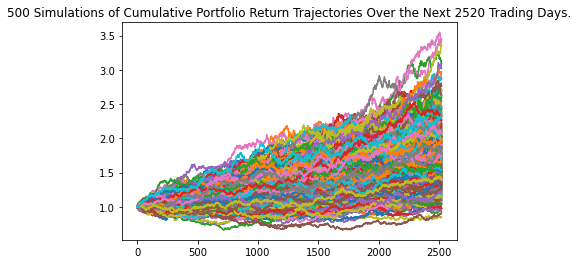

In [57]:
sim_inc_investment.plot_simulation()

In [58]:
sim_inc_investment_stats=sim_inc_investment.summarize_cumulative_return()
sim_inc_investment_stats

count           500.000000
mean              1.693916
std               0.413892
min               0.852456
25%               1.393386
50%               1.646177
75%               1.920094
max               3.453624
95% CI Lower      1.052394
95% CI Upper      2.661858
Name: 2520, dtype: float64

In [59]:
required_investment = 30000
ci_upper = sim_inc_investment_stats[9]*initial_investment
ci_lower = sim_inc_investment_stats[8]*initial_investment
print(f'Expected portfolio returns with 95% upper confidence interval : {round(ci_upper,2)}')
print(f'Expected portfolio returns with 95% lower confidence interval : {round(ci_lower,2)}')

Expected portfolio returns with 95% upper confidence interval : 53237.16
Expected portfolio returns with 95% lower confidence interval : 21047.89


## With 30,000 initial investment , same returns can be expected in 10 years that are possible with 20,000 but in 30 years.